In [1]:
import os
import pickle
from copy import deepcopy
from pathlib import Path
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pybullet as p

# import rlberry.colab_utils.display_setup
import tensorflow as tf
from absl import app, flags
from gym.wrappers import Monitor

# from rlberry.colab_utils.display_setup import show_video
from scipy.spatial import ConvexHull

import ravens.utils.utils as ravens_utils
from ravens import agents, dataset, tasks
from ravens.environments.environment import Environment
from ravens.utils import utils


pybullet build time: May 20 2022 19:43:01
2023-01-04 15:14:22.851910: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
task_name = "block-insertion"
agent = "transporter"
train_run = 0
n_demos = 100
n_steps = 50

assets_root = "ravens/ravens/environments/assets/"
data_dir = "dataset/"
root_dir = "./"
path_to_predictions = f"predictions/{task_name}-{agent}-{n_demos}-{train_run}/"
name = f"{task_name}-{agent}-{n_demos}-{train_run}/"

env = Environment(assets_root, disp=True, shared_memory=False, hz=480, use_egl=False)
task = tasks.names[task_name]()
task.mode = "test"

# Load test dataset.
ds = dataset.Dataset(os.path.join(data_dir, f"{task_name}-test"))
agent = agents.names[agent](name, task_name, root_dir)
agent.load(n_steps)
# vis = ravens_utils.create_visualizer()
# ravens_utils.meshcat_visualize()

episode, seed = ds.load(0)
goal = episode[-1]
total_reward = 0
np.random.seed(seed)
env.seed(seed)
env.set_task(task)
obs = env.reset()
info = None

act = agent.act(obs, info, goal)
obs, reward, done, info = env.step(act)
act["camera_config"] = agent.cam_config
print(f"Total Reward: {total_reward} Done: {done}")
if done:
    pass


: 

: 

In [13]:
episode, seed = ds.load(1)
goal = episode[-1]
total_reward = 0
np.random.seed(seed)
env.seed(seed)
env.set_task(task)
obs = env.reset()
info = None
actions = []
for _ in range(task.max_steps):
    act = agent.act(obs, info, goal)
    obs, reward, done, info = env.step(act)
    actions.append(act)
    # act["camera_config"] = agent.cam_config
    # actions.append(act)
    print(f"Total Reward: {total_reward} Done: {done}")
    if done:
        pass


Total Reward: 0 Done: True
Total Reward: 0 Done: True
Total Reward: 0 Done: True


In [18]:
from gym.wrappers.monitoring.video_recorder import VideoRecorder

task_name = "block-insertion"
agent = "transporter"
train_run = 0
n_demos = 100
n_steps = 50

assets_root = "ravens/ravens/environments/assets/"
data_dir = "dataset/"
root_dir = "./"
path_to_predictions = f"predictions/{task_name}-{agent}-{n_demos}-{train_run}/"
name = f"{task_name}-{agent}-{n_demos}-{train_run}/"

env = Environment(assets_root, disp=True, shared_memory=False, hz=480, use_egl=False)
task = tasks.names[task_name]()
task.mode = "test"

# Load test dataset.
ds = dataset.Dataset(os.path.join(data_dir, f"{task_name}-test"))
agent = agents.names[agent](name, task_name, root_dir)
agent.load(n_steps)



env = deepcopy(env)
env = Monitor(env, "./videos", force=True)
episode, seed = ds.load(0)
goal = episode[-1]
np.random.seed(seed)
env.seed(seed)
env.set_task(task)

done = False
info = None
obs = env.reset()
env.render(mode="rgb_array")
for _ in range(task.max_steps):
    # while not done:
    act = agent.act(obs, info, goal)
    obs, reward, done, info = env.step(act)
    env.render(mode="rgb_array")
    if done:
        break

p.disconnect()


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Microsoft Corporation
GL_RENDERER=D3D12 (AMD Radeon(TM) Graphics)
GL_VERSION=3.3 (Core Profile) Mesa 21.2.6
GL_SHADING_LANGUAGE_VERSION=3.30
pthread_getconcurrency()=0
Version = 3.3 (Core Profile) Mesa 21.2.6
Vendor = Microsoft Corporation
Renderer = D3D12 (AMD Radeon(TM) Graphics)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
text argument:ravens/ravens/environments/assets/
int args: [ven = Microsoft Corporation
ven = Microsoft Corporation


GL error 0x500 detected in glGenBuffers


Loading pre-trained model at 50 iterations.


/home/matias/.pyenv/versions/3.7.12/envs/RECVIS/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [17]:
p.disconnect()

numActiveThreads = 0
stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed
finished
numActiveThreads = 0
btShutDownExampleBrowser stopping threads
Thread with taskId 0 exiting
Thread TERMINATED
destroy semaphore
semaphore destroyed
destroy main semaphore
main semaphore destroyed


In [3]:
from gym.envs.registration import register
import gym
import ravens

register(
    id="robot/env-v0",
    entry_point="ravens.environments.environment:Environment",
    max_episode_steps=300,
)


In [5]:
import gym
import ravens

env = gym.make(
    "robot/env-v0",
    assets_root=assets_root,
    disp=True,
    shared_memory=False,
    hz=480,
    use_egl=False,
)

env = deepcopy(env)
env = Monitor(env, "./videos", force=True)
episode, seed = ds.load(0)
goal = episode[-1]
np.random.seed(seed)
env.seed(seed)
env.set_task(task)

done = False
info = None
obs = env.reset()
env.render(mode="rgb_array")
for _ in range(task.max_steps):
    # while not done:
    act = agent.act(obs, info, goal)
    obs, reward, done, info = env.step(act)
    env.render(mode="rgb_array")
    print(reward)
    if done:
        break
print(done)


GL error 0x500 detected in glGenBuffers


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Microsoft Corporation
GL_RENDERER=D3D12 (AMD Radeon(TM) Graphics)
GL_VERSION=3.3 (Core Profile) Mesa 21.2.6
GL_SHADING_LANGUAGE_VERSION=3.30
pthread_getconcurrency()=0
Version = 3.3 (Core Profile) Mesa 21.2.6
Vendor = Microsoft Corporation
Renderer = D3D12 (AMD Radeon(TM) Graphics)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
text argument:ravens/ravens/environments/assets/
int args: [ven = Microsoft Corporation
ven = Microsoft Corporation
Instructions for updating:
Simply pass a True/False value to the `

MovieWriter imagemagick unavailable; using Pillow instead.


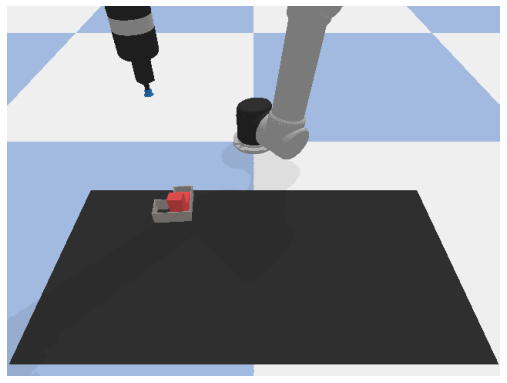

In [11]:
from matplotlib import animation
import matplotlib.pyplot as plt
import gym

"""
Ensure you have imagemagick installed with 
sudo apt-get install imagemagick
Open file in CLI with:
xgd-open <filelname>
"""


def save_frames_as_gif(frames, path="./", filename="gym_animation.gif"):

    # Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis("off")

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    anim.save(path + filename, writer="imagemagick", fps=60)


# Run the env
frames = []
episode, seed = ds.load(1)
goal = episode[-1]
np.random.seed(seed)
env.seed(seed)
env.set_task(task)
observation = env.reset()
done = False
info = None
frames.append(env.render(mode="rgb_array"))
for _ in range(task.max_steps):
    act = agent.act(observation, info, goal)
    observation, reward, done, info = env.step(act)
    frames.append(env.render(mode="rgb_array"))
    if done:
        break
# for t in range(1000):
#     #Render to frames buffer
#     frames.append(env.render(mode="rgb_array"))
#     action = env.action_space.sample()
#     _, _, done, _ = env.step(action)
#     if done:
#         break
# env.close()
save_frames_as_gif(frames)
